In [49]:
import random

import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

import sklearn
from sklearn.model_selection import train_test_split

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.callbacks import TensorBoard

## Model Parameters

In [50]:
NUM_CLASSES = 10
LOSS = 'categorical_crossentropy'
OPTIMIZER = 'adam'
TEST_SPLIT = 0.1

## Load dataset

In [51]:
(x_train_raw, y_train_raw),(x_test_raw, y_test_raw) = keras.datasets.mnist.load_data()

img_count_train = x_train_raw.shape[0]
img_count_test = x_test_raw.shape[0]
img_x_dim = x_train_raw.shape[1]
img_y_dim = x_train_raw.shape[2]

### Confirm handwritten image vs truth

Handwritten sample #14292 is a '6'


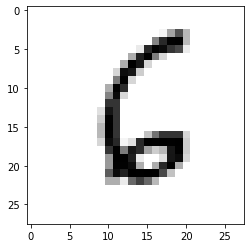

In [52]:
i = random.randrange(img_count_train)
print(f"Handwritten sample #{i} is a '{y_train_raw[i]}'")
plt.imshow(x_train_raw[i], cmap='gray_r', vmin = 0, vmax = 255);

## Pre-process Data

The raw input data is N X\*Y-sized images in the form of [N, X, Y]. So need to reshape input data to N X\*Y-shaped rows.

In [53]:
x_train = np.reshape(x_train_raw, (img_count_train, img_x_dim * img_y_dim))
x_test = np.reshape(x_test_raw, (img_count_test, img_x_dim * img_y_dim))

One-hot encode the raw labels

In [54]:
y_train = to_categorical(y_train_raw, NUM_CLASSES)
y_test = to_categorical(y_test_raw, NUM_CLASSES)

# print(y_train_raw[i:i+5])
# print('  -------------------')
# print(f"#{[0,1,2,3,4,5,6,7,8,9]}")
# print(y_train[i:i+5])

## Build & Compile Model

In [64]:
def dense_nn(X, y, epochs, batch_size, model_layout):

    depth = len(model_layout)
    layout_str = '-'.join(str(int(width)) for width in model_layout)
    model_name = f"dense_{epochs}-epochs_{batch_size}-batches_{layout_str}-dense"
    print(f" -- Building Model: {model_name}")

    # create train & val sets
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=TEST_SPLIT, shuffle=True)
    
    # define model
    model = Sequential()
    
    # first dense layer
    model.add(Dense(model_layout[0], input_dim=img_x_dim * img_y_dim, activation='relu'))

    # remaining dense layers
    for width in model_layout[1:]:
        model.add(Dense(width, activation='relu'))

    # output layer
    model.add(Dense(NUM_CLASSES, activation='softmax'))

    # compile the model
    tensorboard = TensorBoard(log_dir=f"logs/{model_name}")
    model.compile(loss=LOSS, optimizer=OPTIMIZER, metrics=['accuracy'])

    # stop fitting early if validation loss gets worse
    early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)

    # train (fit) the model to the dataset
    history = model.fit(X_train, y_train,
                        validation_data=(X_val, y_val),
                        epochs=epochs,
                        batch_size=batch_size,
                        verbose=1,
                        callbacks=[early_stop, tensorboard])

    # # plot loss during training
    # plt.title('Loss')
    # plt.plot(history.history['accuracy'], label='accuracy')
    # plt.plot(history.history['val_accuracy'], label='val_accuracy')
    # plt.plot(history.history['loss'], label='loss')
    # plt.plot(history.history['val_loss'], label='val_loss')
    # plt.legend()
    # plt.show()

    return model


In [65]:
my_model = dense_nn(x_train, y_train, 5, 64, [784, 784/4, 784/16])
my_model = dense_nn(x_train, y_train, 5, 64, [784/2, 784/8, 784/16])
my_model = dense_nn(x_train, y_train, 5, 128, [784, 784/4, 784/16])
my_model = dense_nn(x_train, y_train, 5, 128, [784/2, 784/8, 784/16])

 -- Building Model: dense_5-epochs_64-batches_784-196-49-dense
(60000, 784)


IndexError: tuple index out of range

In [ ]:
def conv2d_nn(X, y, epochs, batch_size, model_layout):

    layout_str = '-'.join(str(int(width)) for width in model_layout)
    model_name = f"dense_{epochs}-epochs_{batch_size}-batches_{layout_str}-dense"
    print(f" -- Building Model: {model_name}")

    img_x_dim = X.shape[1]
    img_y_dim = X.shape[2]
    depth = len(model_layout)
    
    # create train & val sets
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=TEST_SPLIT, shuffle=True)
    
    # define model
    model = Sequential()
    
    # first dense layer
    model.add(Dense(model_layout[0], input_dim=img_x_dim * img_y_dim, activation='relu'))

    # remaining dense layers
    for width in model_layout[1:]:
        model.add(Dense(width, activation='relu'))

    # output layer
    model.add(Dense(NUM_CLASSES, activation='softmax'))

    # compile the model
    tensorboard = TensorBoard(log_dir=f"logs/{model_name}")
    model.compile(loss=LOSS, optimizer=OPTIMIZER, metrics=['accuracy'])

    # stop fitting early if validation loss gets worse
    early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)

    # train (fit) the model to the dataset
    history = model.fit(X_train, y_train,
                        validation_data=(X_val, y_val),
                        epochs=epochs,
                        batch_size=batch_size,
                        verbose=1,
                        callbacks=[early_stop, tensorboard])

    # plot loss during training
    plt.title('Loss')
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.legend()
    plt.show()

    return model

## Evaluate model

In [58]:
predictions = my_model.predict(x_test)
pred_labels = np.argmax(predictions, axis=1)

# evaluate the keras model
_, train_mse = my_model.evaluate(x_train, y_train, verbose=0)
_, test_mse = my_model.evaluate(x_test, y_test, verbose=0)

print('Train MSE:  %.4f' % train_mse)
print('Test MSE:  %.4f' % test_mse)

 56/313 [====>.........................] - ETA: 0s

2022-08-07 19:44:08.324206: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 2ms/step
Train MSE:  0.9747
Test MSE:  0.9630


Let's take a look at the wrong predictions. Are they obviously wrong or understandably wrong? (i.e., sloppy handwriting)

In [ ]:
# save off the wrong predictions
wrong_predictions = x_test_raw[pred_labels != y_test_raw]
wrong_labels = pred_labels[pred_labels != y_test_raw]
right_labels = y_test_raw[pred_labels != y_test_raw]

# Characterize amount of wrongness
percent_wrong = wrong_predictions.shape[0]/x_test.shape[0]*100
print(f"Number Wrongly Predicted:  {wrong_predictions.shape[0]}")
print(f"Percent Wrong Predictions: {percent_wrong:.2f}%")

random_wrong = random.randrange(wrong_predictions.shape[0])
print(f"Handwritten sample #{random_wrong}:")
print(f" - Predicted: '{wrong_labels[random_wrong]}'")
print(f" - Actual:     '{right_labels[random_wrong]}'")
plt.imshow(wrong_predictions[random_wrong], cmap='gray_r', vmin = 0, vmax = 255);